# Credit Card Fraud Detection

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets 

Import Data

Exploratory Data Analysis

Data cleaning: 
* Remove outliers in features that have higher correlation
* Scalar: Only time and amount are not scaled

Undersampling of Imbalanced data: randomly undersampling method
* Model: SVM

Oversampling of Imbalanced data
* Model: Logistic Regression, Random Forest

ROC/AUC/F1 to choose the best model

Test Accuracy

In [2]:
# general
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scalar
from sklearn.preprocessing import RobustScaler

# split dataset
from sklearn.model_selection import train_test_split

# imblearn to oversample the dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import make_pipeline, Pipeline

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# cv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, average_precision_score
from sklearn.metrics import classification_report

# store and load models
from joblib import dump, load

## Import Data

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
pd.set_option('display.max_columns', None)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Total observation is 284807 and there are 30 features

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No missing values in the dataset

In [6]:
df.isnull().sum().sum()

0

## Exploratory Data Analysis

### Highly Imbalanced Dataset
The dataset is highly imbalanced with 0.173% of class being positive and 99.83% of class being negative.

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
percent_of_pos_class = round(df['Class'].value_counts()[1]/(df['Class'].value_counts()[0]+df['Class'].value_counts()[1]),5)*100
print("The percent of positive class is: {}".format(percent_of_pos_class))

The percent of positive class is: 0.173


### The Amount feature is skewed to the right

Text(0.5, 1.0, 'Distribution of Credit Card Transaction Amounts')

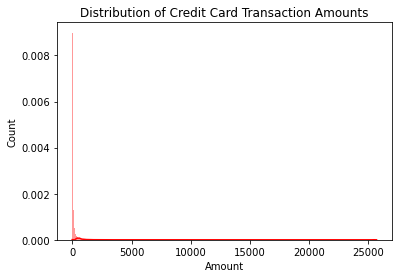

In [9]:
sns.distplot(df['Amount'],bins=300,color='r')
plt.ylabel('Count')
plt.title('Distribution of Credit Card Transaction Amounts')

In [10]:
df['Amount'].mean()

88.34961925087359

### Correlation Matrix

Negative Correlation: V10, V12, V14 and V17 have negative correlation with the class feature. Therefore, the higher the values are in these features, the less likely the transaction would be fraud.

Negative Correlation: V7, V9 and V18 have negative correlation with the class feature but the magnitude of coefficient values are less than V10, V12, V14 and V17. Therefore, the higher the values are in these features, the less likely the transaction would be fraud.

Positive Correlation: V2, V4 and V11 have positive correlation with the class feature. Therefore, the lower the values are in these features, the less likely the transaction would be fraud.

In [11]:
corrMatrix = df.corr()

Text(69.0, 0.5, 'Credit Card Features')

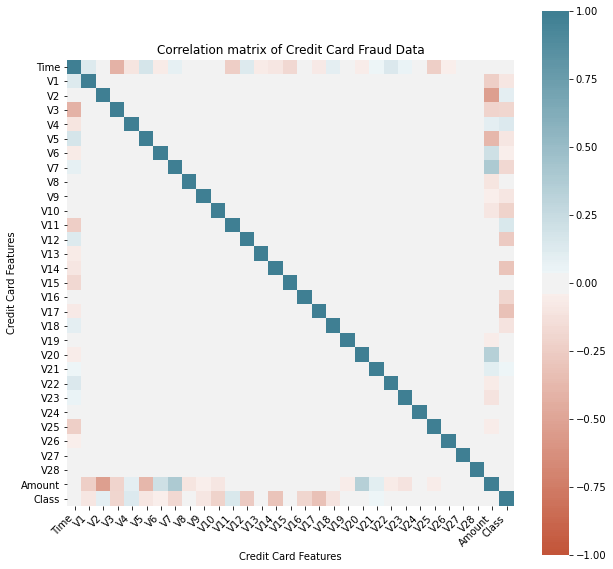

In [73]:
plt.figure(figsize=(10, 1))
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title("Correlation matrix of Credit Card Fraud Data")
plt.xlabel("Credit Card Features")
plt.ylabel("Credit Card Features")

### Use Boxplot to Visualize the Outliers Group by Class for Highly Correlated Features

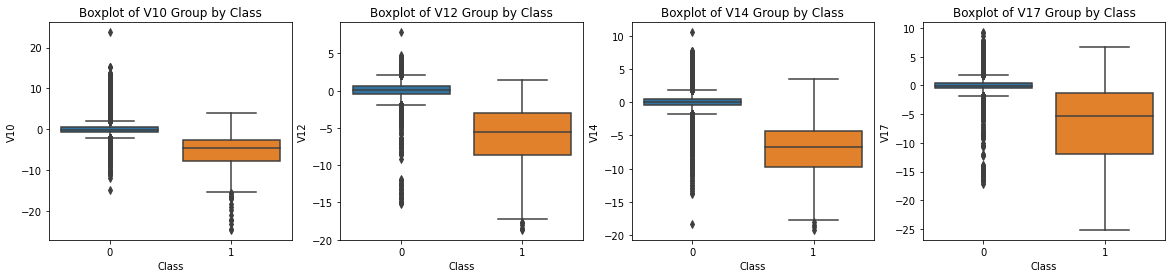

In [13]:
features_high_pos_corr = ['V10', 'V12', 'V14', 'V17']
features_high_med_pos_corr = ['V7', 'V9', 'V18']
features_high_neg_corr = ['V2', 'V4', 'V11']

def Boxplot(feature_list):
    f, axes = plt.subplots(ncols=len(feature_list), figsize=(20,4))
    for i in range(len(feature_list)):
        sns.boxplot(x="Class", y=feature_list[i], data=df, ax=axes[i])
        axes[i].set_title('Boxplot of ' + str(feature_list[i]) + ' Group by Class')

Boxplot(features_high_pos_corr)

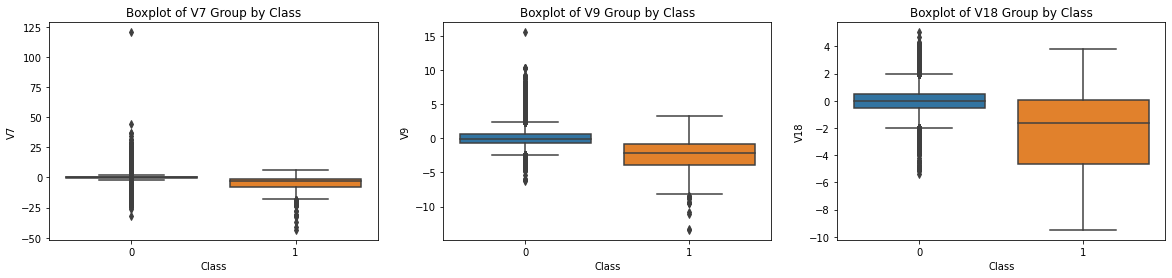

In [14]:
Boxplot(features_high_med_pos_corr)

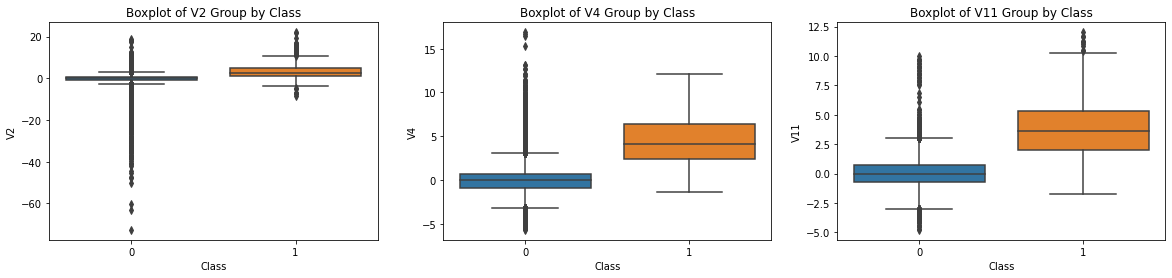

In [15]:
Boxplot(features_high_neg_corr)

## Data Cleaning

### Scale time and amount features with robust scaler because it deals better with outliers

In [16]:
# copy the original dataframe for reference

df_original = df

Text(0.5, 1.0, 'Distribution of Credit Card Transaction Time')

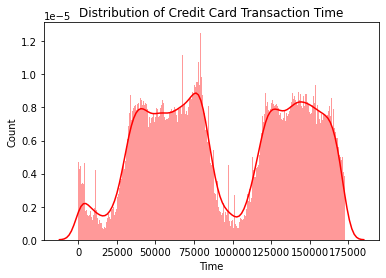

In [17]:
# display the distribution of Time

sns.distplot(df['Time'],bins=300,color='r')
plt.ylabel('Count')
plt.title('Distribution of Credit Card Transaction Time')

In [18]:
# Scale Time and Amount features
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

In [19]:
df.drop(['Time','Amount'], axis=1, inplace=True)

In [20]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [21]:
# change the column positions for better visualization

cols = list(df.columns)
org = cols[:-2]
added = cols[-2:]
added

['scaled_amount', 'scaled_time']

In [22]:
cols = added + org

In [23]:
df = df.reindex(columns=cols)

In [24]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Remove outliers for features highly correlated with the Class

* Remove Outliers with IQR x 3 for class = 0 and with IQR x 1.5 for class = 1

Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(threshold * IQR)
6. Find the upper Range = Q3 + (threshold * IQR)

In [25]:
def outlier_detection (datacolumn, threshold):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return lower_bound,upper_bound

In [26]:
features_corr_name_list = features_high_pos_corr + features_high_med_pos_corr + features_high_neg_corr

In [27]:
# number of rows before removing extreme values
len(df)

284807

In [28]:
# From the boxplots above, the IQR group by the class is different,so we remove the extreme values based on the IQR per class

for col_name in features_corr_name_list:
    class_list = [0, 1]
    print(col_name)
    for class_ in class_list:
        datacolumn = df[col_name].loc[df['Class'] == class_].values
        threshold = 1.5
        if class_ == 0:
            threshold = 3
        lower_bound, upper_bound = outlier_detection(datacolumn, threshold)
        print('For class = {}, the lower bound of {} is {}'.format(class_, col_name, lower_bound))
        print('For class = {}, the upper bound of {} is {}'.format(class_, col_name, upper_bound))

        outliers = [x for x in datacolumn if x < lower_bound or x > upper_bound]
        print('For class = {}, number of outliers in {} is {}'.format(class_, col_name, len(outliers)))

        df = df.drop(df[(df['Class'] == class_) & ((df[col_name] > upper_bound) | (df[col_name] < lower_bound))].index)
#         temp = df[(df['Class'] == class_) & ((df[col_name] > upper_bound) | (df[col_name] < lower_bound))]

V10
For class = 0, the lower bound of V10 is -3.496923225038911
For class = 0, the upper bound of V10 is 3.4191786865985154
For class = 0, number of outliers in V10 is 2897
For class = 1, the lower bound of V10 is -15.47046969983434
For class = 1, the upper bound of V10 is 5.099587558797303
For class = 1, number of outliers in V10 is 19
V12
For class = 0, the lower bound of V12 is -3.45156303178569
For class = 0, the upper bound of V12 is 3.670681469739367
For class = 0, number of outliers in V12 is 916
For class = 1, the lower bound of V12 is -16.922496886663865
For class = 1, the upper bound of V12 is 5.633585132371216
For class = 1, number of outliers in V12 is 13
V14
For class = 0, the lower bound of V14 is -3.125920089877009
For class = 0, the upper bound of V14 is 3.205918183868025
For class = 0, number of outliers in V14 is 1545
For class = 1, the lower bound of V14 is -17.101993690511843
For class = 1, the upper bound of V14 is 3.3988933645677344
For class = 1, number of outlie

In [29]:
# The number of rows after removing outliers
len(df)

273874

## Randomly Undersample

In [30]:
df_sample = df.sample(frac=1, random_state=42)

# amount of fraud classes 355 rows.
fraud_df = df_sample.loc[df_sample['Class'] == 1]
num_of_fraud_df = len(fraud_df)
non_fraud_df = df_sample.loc[df_sample['Class'] == 0][:num_of_fraud_df]

normal_dist_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_dist_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
218442,2.426605,0.665280,-6.352337,-2.370335,-4.875397,2.335045,-0.809555,-0.413647,-4.082308,2.239089,-1.986360,-5.165331,2.942939,-4.125722,-0.433094,-3.518131,0.420777,-5.104480,-7.925389,-3.415707,0.718332,0.186898,1.325218,1.226745,-1.485217,-1.470732,-0.240053,0.112972,0.910591,-0.650944,1
167305,1.172221,0.398395,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,1
243378,-0.081325,0.789694,1.964684,0.110489,-1.556442,1.307862,0.376046,-0.886383,0.507934,-0.241976,0.036623,0.442940,0.687935,0.685665,-1.029569,0.870185,-1.151024,-0.535254,-0.308310,-0.109191,0.036175,-0.320850,0.104099,0.443553,-0.002509,0.005577,0.391306,-0.510731,-0.024165,-0.071459,0
120009,-0.232516,-0.105899,-0.650080,1.188027,1.279089,0.046970,-0.049677,-0.738305,0.584391,0.095265,-0.119809,-0.227083,0.200520,-0.263634,-0.684055,-0.307838,1.218196,0.009687,0.437129,-0.620247,-0.596094,0.149542,-0.254869,-0.594694,0.091589,0.324928,-0.245594,0.089165,0.366579,0.156258,0
181966,0.251520,0.475898,-0.769172,1.342212,-2.171454,-0.151513,-0.648374,-0.973504,-1.706658,0.313745,-1.982302,-3.158127,1.341572,-3.299472,1.247647,-6.393373,-0.053205,-3.258046,-3.348896,0.217331,-0.917408,-0.102294,-0.036122,-0.753591,-0.047113,0.358493,-0.287407,0.476506,0.250531,0.250987,1


In [31]:
len(fraud_df)

355

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


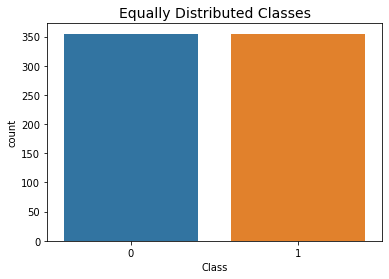

In [32]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## SVM Model

The optimal parameter is: C=0.7 and kernel = linear

In [57]:
# undersampling before the CV

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Support Vector Classifier
clf_svm = SVC(probability=True)
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#grid_svc = GridSearchCV(clf_svm, svc_params, scoring = 'roc_auc')
#grid_svc = GridSearchCV(clf_svm, svc_params, scoring = 'roc_auc')
grid_svc = GridSearchCV(clf_svm, svc_params, scoring = 'recall')

grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.5, 0.7, 0.9, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='recall')

In [60]:
# SVM best estimator
svc = grid_svc.best_estimator_

In [61]:
svc

SVC(C=0.5, kernel='linear', probability=True)

In [62]:
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

In [63]:
print('AUC Score of Training Dataset of Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))

AUC Score of Training Dataset of Support Vector Classifier:  0.9734098018769552


In [64]:
X = df.drop('Class', axis=1)
y = df['Class']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# SVM Train accuracy
svm_best_probs_train = svc.predict_proba(X_train)[:, 1]

In [67]:
# SVM test accuracy
svm_best_prob = svc.predict_proba(X_test)

In [68]:
svm_best_prob = svm_best_prob[:, 1]

In [69]:
svm_best_prob

array([0.11229934, 0.07410984, 0.11728409, ..., 0.00724112, 0.14350558,
       0.0130736 ])

Metrics for the testing set

In [70]:
svc_y_pred = svc.predict(X_test)

In [71]:
print(svm_best_prob.round())

[0. 0. 0. ... 0. 0. 0.]


In [72]:
print('Recall Score: {:.2f}'.format(recall_score(y_test, svc_y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, svc_y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, svc_y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, svc_y_pred)))

Recall Score: 0.93
Precision Score: 0.03
F1 Score: 0.06
Accuracy Score: 0.96


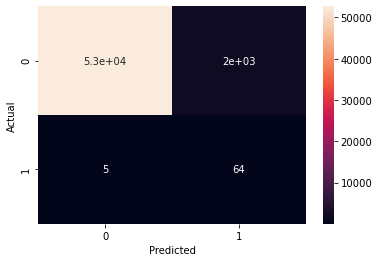

In [74]:
confusion_matrix = pd.crosstab(y_test, svc_y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [77]:
svc_pred = svc.predict(X_test)

In [61]:
print('Logistic Regression:')
print(classification_report(y_test, svc_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     54706
           1       0.03      0.93      0.05        69

    accuracy                           0.96     54775
   macro avg       0.51      0.94      0.52     54775
weighted avg       1.00      0.96      0.98     54775



In [ ]:
# clf_svm = SVC()

# svc_params = {'C': [0.5, 0.7, 0.9, 1], 
#               'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

# model = Pipeline([('sampling', SMOTE(sampling_strategy='minority')), ('class', clf_svm)])
# grid_svc = GridSearchCV(clf_svm, svc_params)
# grid_svc.fit(X_train, y_train)

Text(0.5, 1.0, 'OverSampling Precision-Recall Curve for SVM \n Average Precision Recall Score is 0.03')

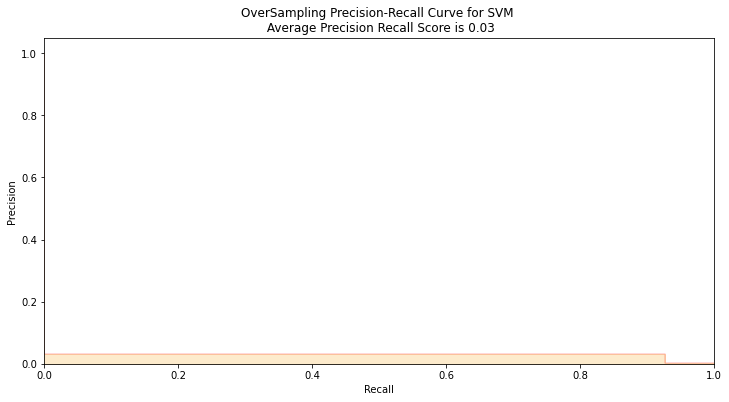

In [78]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, svc_pred)
avg_precision_recall_score = average_precision_score(y_test, svc_pred).round(2)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall Curve for SVM \n Average Precision Recall Score is {}'.format(avg_precision_recall_score))


# Logistic Regression Model

* Oversampling
* 5-fold cross validation
* Find the best parameters

### Split dataset into training and testing sets with 20% in testing set

In [71]:
X = df.drop('Class', axis=1)
y = df['Class']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Oversampling during the cross validation process for Logistic Regression

Use cross validation to find the optimal penalty and inverse of lambda for the logistic regression. The oversampling is done during the cross validation process. Only the minority class in the training blocks is oversampled with SMOTE and the validation set and test set are original data.

The SMOTE reference: 
* SMOTE usage with GridSearchCV: https://towardsdatascience.com/imbalanced-class-sizes-and-classification-models-a-cautionary-tale-part-2-cf371500d1b3
* Include pipeline in CV stackoverflow: https://stackoverflow.com/questions/58815016/cross-validating-with-imblearn-pipeline-and-gridsearchcv


In [84]:
# logistic regression
clf = LogisticRegression()

# the hyper-parameters to try: penalty and inverse of lambda
log_reg_params = {"class__penalty": ['l1', 'l2'], 
                  'class__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# use smote to oversample the training set not the validation set in the CV
model = Pipeline([('sampling', SMOTE(sampling_strategy='minority')), ('class', clf)])
randomized_log_regression = RandomizedSearchCV(model, log_reg_params)
randomized_log_regression.fit(X_train, y_train)

/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supp

/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supp

/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supp

/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supp

/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/imblearn/pipeline.py", line 266, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jiongjiangduan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supp

RandomizedSearchCV(estimator=Pipeline(steps=[('sampling',
                                              SMOTE(sampling_strategy='minority')),
                                             ('class', LogisticRegression())]),
                   param_distributions={'class__C': [0.001, 0.01, 0.1, 1, 10,
                                                     100, 1000],
                                        'class__penalty': ['l1', 'l2']})

### Find the best parameters of the logistic regression model

Summary of result:
* penalty = L2
* C = 0.001

In [85]:
# find the best score and best estimators
best_score = randomized_log_regression.best_score_
best_est = randomized_log_regression.best_estimator_
y_pred_test = best_est.predict(X_test)
y_pred_train = best_est.predict(X_train)

print("The best hyper-parameters of logistic regression are {}".format(best_est))
print("The test accuracy of the model with the best hyper-parameters is {}".format(best_score))

The best hyper-parameters of logistic regression are Pipeline(steps=[('sampling', SMOTE(sampling_strategy='minority')),
                ('class', LogisticRegression(C=0.001))])
The test accuracy of the model with the best hyper-parameters is 0.9747693862315593


The best hyperparameter is C=0.001 and the penalty is L2

## Evaluate the Model Performance

* Precision-recall
* ROC
* Confusion Matrix
* F1 score

### Calculate the metrics

For the credit card fraud, we want the False Negative Rate (Type II Error) to be as small as possible because we don't want to predict the transaction is not fraud but indeed it is fraud. From the formula below, to achieve lower FNR, we need to look at the recall. The recall which is the same as TPR should have a higher score.

Recall = TPR

FNR = 1 - Recall

Reference:
* precision, recall and accuracy: https://medium.com/@shivangisareen/precision-recall-accuracy-6a214187f059#:~:text=There%20are%20two%20other%20metrics,of%20false%20positives%20is%20high.&text=Recall%2D%20When%20there%20is%20a,detection%20or%20sick%20patient%20detection.

In [86]:
# training accuracy of 
log_reg_best_probs_train = best_est.predict_proba(X_train)[:, 1]

In [112]:
log_reg_best_probs = best_est.predict_proba(X_test)

In [113]:
log_reg_best_probs = log_reg_best_probs[:, 1]

The metrics for testing set of logistic regression

In [114]:
print('Recall Score: {:.2f}'.format(recall_score(y_test, log_reg_best_probs.round())))
print('Precision Score: {:.2f}'.format(precision_score(y_test, log_reg_best_probs.round())))
print('F1 Score: {:.2f}'.format(f1_score(y_test, log_reg_best_probs.round())))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, log_reg_best_probs.round())))

Recall Score: 0.90
Precision Score: 0.04
F1 Score: 0.08
Accuracy Score: 0.98


### Plot the Precision-Recall Curve
When the test data is very imbalanced, we prefer PRC over ROC.

Reference:
* PRC: https://blog.csdn.net/weixin_31866177/article/details/88776718

Text(0.5, 1.0, 'OverSampling Precision-Recall Curve for Logistic Regression \n Average Precision Recall Score is 0.8')

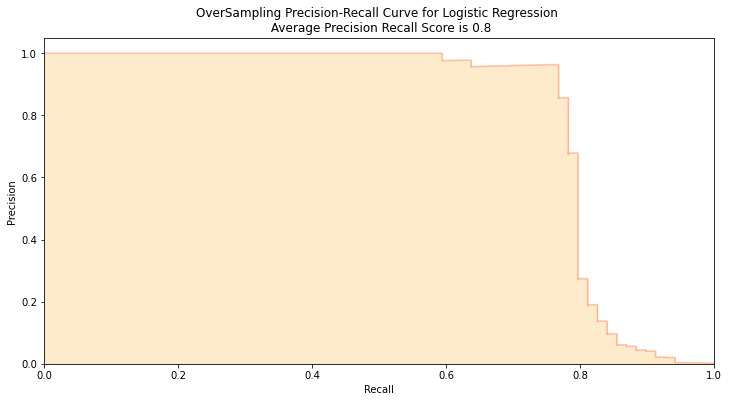

In [115]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, log_reg_best_probs)
avg_precision_recall_score = average_precision_score(y_test, log_reg_best_probs).round(2)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall Curve for Logistic Regression \n Average Precision Recall Score is {}'.format(avg_precision_recall_score))


### Confusion Matrix

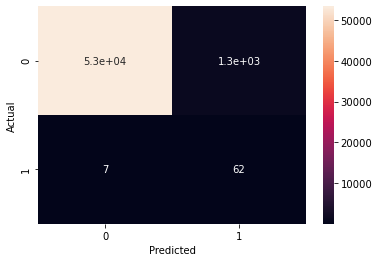

In [116]:
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### ROC curve and ROC AUC:

The ROC_AUC score for test set is 0.9759

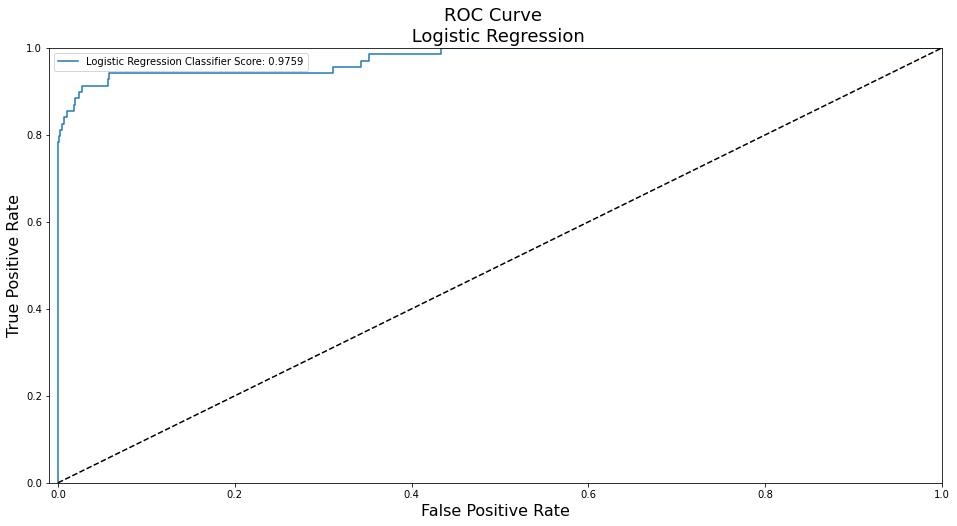

In [39]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_best_probs)

def graph_roc_curve_multiple(log_fpr, log_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Logistic Regression', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_best_probs)))
#     plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
#     plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
#     plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr)

# Random Forest Model

The random forest model always predict 0 to achieve higher accuracy score. However, the recall score is lower than the logistic regression's recall score. Therefore, the logistic regression is better than random forest.

In [40]:
# random forest classifier

clf_rf = RandomForestClassifier(random_state=88)
rf_params = {'class__max_features': ['auto', 'sqrt', 'log2'],
        'class__max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'class__criterion' :['gini', 'entropy']}
pipeline = Pipeline([('sampling', SMOTE(sampling_strategy='minority')), ('class', clf_rf)])
randomized_rf = RandomizedSearchCV(pipeline, rf_params, scoring = 'roc_auc')
   
randomized_rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('sampling',
                                              SMOTE(sampling_strategy='minority')),
                                             ('class',
                                              RandomForestClassifier(random_state=88))]),
                   param_distributions={'class__criterion': ['gini', 'entropy'],
                                        'class__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, 110],
                                        'class__max_features': ['auto', 'sqrt',
                                                                'log2']},
                   scoring='roc_auc')

The Random Forest model with the optimal parameter:

* criterion = entropy
* max_depth = 20
* max_features = log2

In [41]:
rf_best_score = randomized_rf.best_score_
rf_best_est = randomized_rf.best_estimator_
rf_y_pred_test = rf_best_est.predict(X_test)
rf_y_pred_train = rf_best_est.predict(X_train)

print("The best hyper-parameters of random forest are {}".format(rf_best_est))
print("The test accuracy of the model with the best hyper-parameters is {}".format(rf_best_score))

The best hyper-parameters of random forest are Pipeline(steps=[('sampling', SMOTE(sampling_strategy='minority')),
                ('class',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        max_features='log2',
                                        random_state=88))])
The test accuracy of the model with the best hyper-parameters is 0.9655239849770625


In [42]:
rf_best_prob = rf_best_est.predict_proba(X_test)

In [43]:
rf_best_prob = rf_best_prob[:, 1]

In [44]:
print('Recall Score: {:.2f}'.format(recall_score(y_test, rf_best_prob.round())))
print('Precision Score: {:.2f}'.format(precision_score(y_test, rf_best_prob.round())))
print('F1 Score: {:.2f}'.format(f1_score(y_test, rf_best_prob.round())))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, rf_best_prob.round())))

Recall Score: 0.81
Precision Score: 0.97
F1 Score: 0.88
Accuracy Score: 1.00


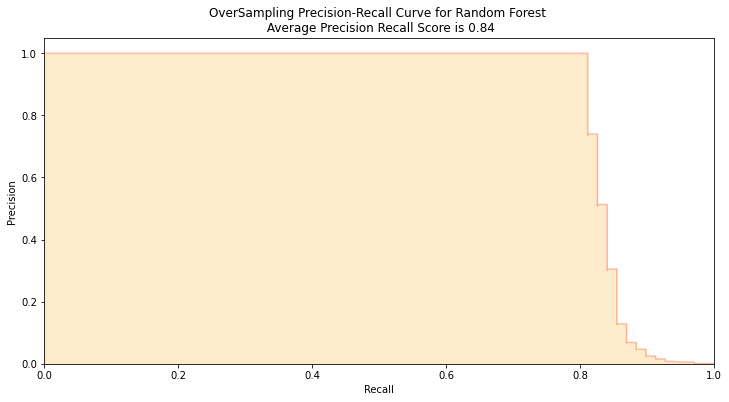

In [45]:
%matplotlib inline

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, rf_best_prob)
avg_precision_recall_score = average_precision_score(y_test, rf_best_prob).round(2)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall Curve for Random Forest \n Average Precision Recall Score is {}'.format(avg_precision_recall_score))
plt.show()

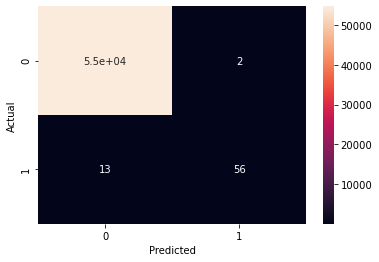

In [46]:
confusion_matrix = pd.crosstab(y_test, rf_y_pred_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [49]:
# save the random forest model for quick loading

dump(rf_best_est, 'random_forest_best_est.joblib')

['random_forest_best_est.joblib']

In [47]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

In [48]:
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Compare the Models By ROC Curve

In [89]:
# load the RF model
clf_rf = load('random_forest_best_est.joblib')

In [95]:
rf_best_probs_train = clf_rf.predict_proba(X_train)[:, 1]


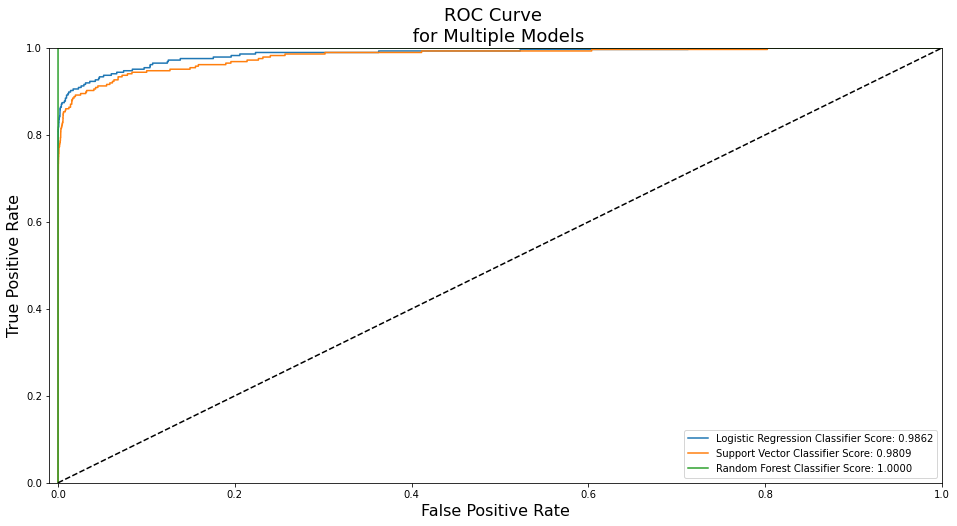

In [103]:
# Training Dataset
log_fpr, log_tpr, _ = roc_curve(y_train, log_reg_best_probs_train)
svc_fpr, svc_tpr, _ = roc_curve(y_train, svm_best_probs_train)
rf_fpr, rf_tpr, _ = roc_curve(y_train, rf_best_probs_train)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n for Multiple Models', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_best_probs_train)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svm_best_probs_train)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_best_probs_train)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr)

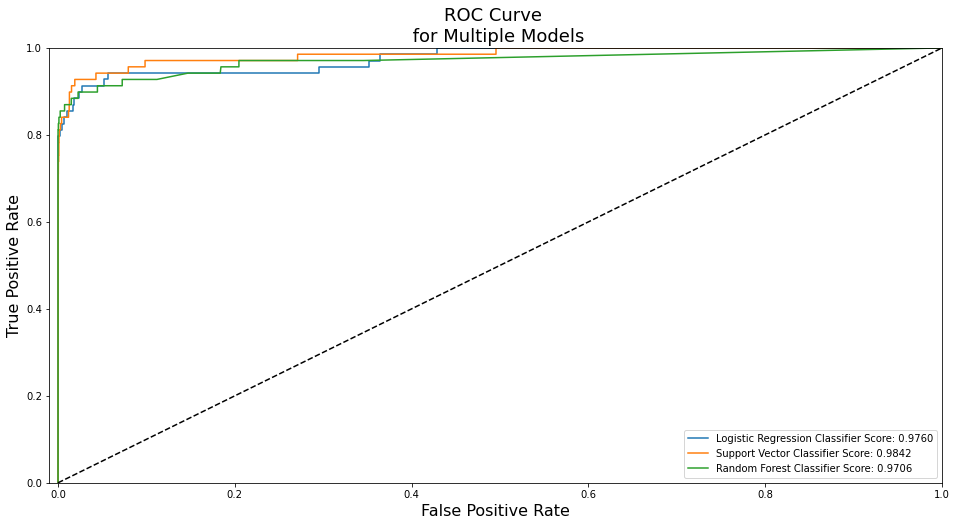

In [117]:
# Testing Dataset
rf_best_prob = clf_rf.predict_proba(X_test)[:, 1]

log_fpr, log_tpr, _ = roc_curve(y_test, log_reg_best_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svm_best_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_best_prob)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n for Multiple Models', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, log_reg_best_probs)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, svm_best_prob)))
    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, rf_best_prob)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, rf_fpr, rf_tpr)